<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project2 - Bike Sharing</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3948/media/bikes.png" width=80%>

## Importing the libraries

In [1]:
import pandas as pd 

import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

## Load and Prepare Data

In [2]:
df_train=pd.read_csv("/home/tiredninja/Documents/ml Test/Mini Project 2 - Regression (Bike Sharing Demand)/train.csv")
df_train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df_test=pd.read_csv("/home/tiredninja/Documents/ml Test/Mini Project 2 - Regression (Bike Sharing Demand)/test.csv")
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## EDA

In [ ]:
df_train.info()
df_train.shape
df_test.shape
df_train.head()
df_test.head()

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df_train.shape


(10886, 12)

In [6]:
df_test.shape


(6493, 9)

In [7]:
df_train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Data Preprocessing

In [9]:
df_train=df_train.drop("datetime",axis=1)
df_train=df_train.drop("registered",axis=1)
df_train=df_train.drop("casual",axis=1)
df_test=df_test.drop("datetime",axis=1)


In [10]:
df_test["atemp"].value_counts


<bound method IndexOpsMixin.value_counts of 0       11.365
1       13.635
2       13.635
3       12.880
4       12.880
         ...  
6488    12.880
6489    12.880
6490    12.880
6491    13.635
6492    13.635
Name: atemp, Length: 6493, dtype: float64>

In [11]:
df_test.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [12]:
df_train.isnull().sum()


season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

In [13]:
df_train["count"].value_counts

<bound method IndexOpsMixin.value_counts of 0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64>

## Strorytelling - Visualization

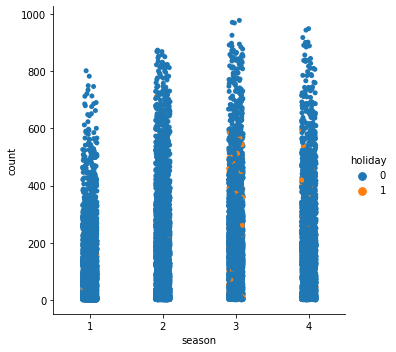

In [14]:
sns.catplot(x="season",y="count",hue="holiday",data=df_train)


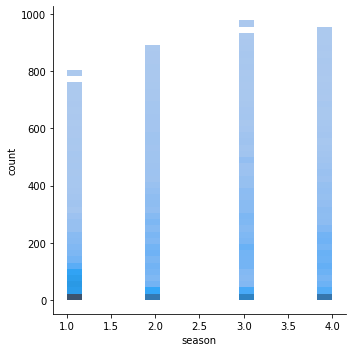

In [15]:
sns.displot(df_train,x="season",y="count")


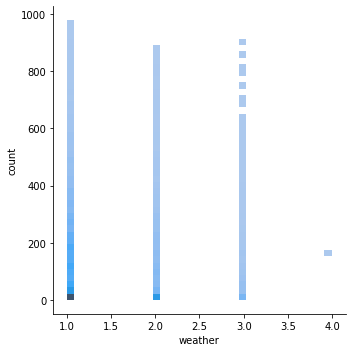

In [16]:
sns.displot(df_train,x="weather",y="count")


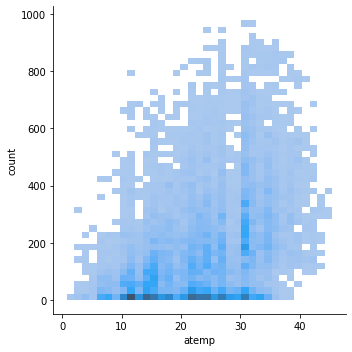

In [17]:
sns.displot(df_train,x="atemp",y="count")


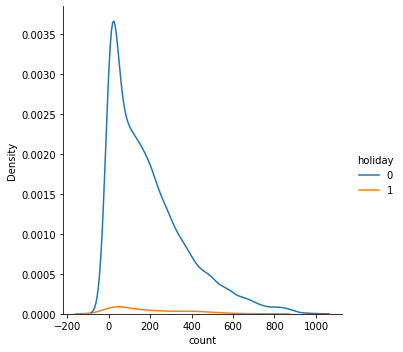

In [18]:
sns.displot(df_train,x="count",hue="holiday",kind="kde")


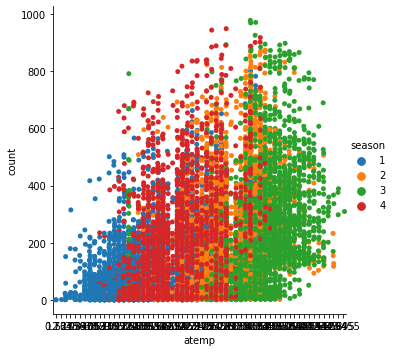

In [19]:
sns.catplot(x="atemp",y="count",hue="season",data=df_train)


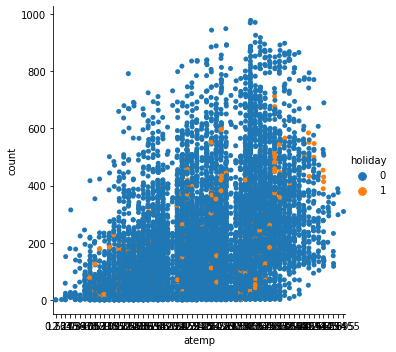

In [20]:
sns.catplot(x="atemp",y="count",hue="holiday",data=df_train)


<AxesSubplot:>

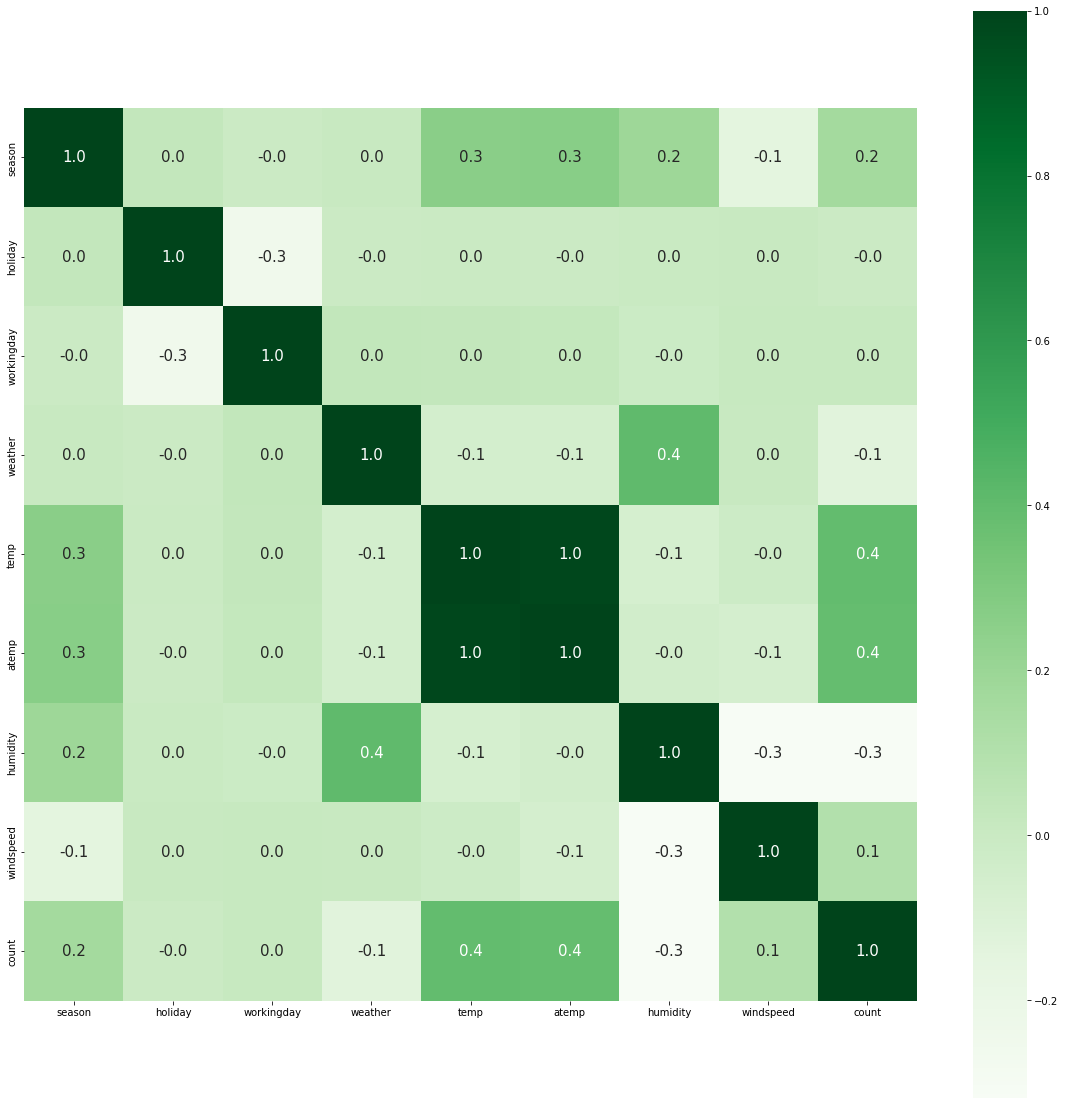

In [21]:
corr = df_train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [22]:
sns.set_style('whitegrid')


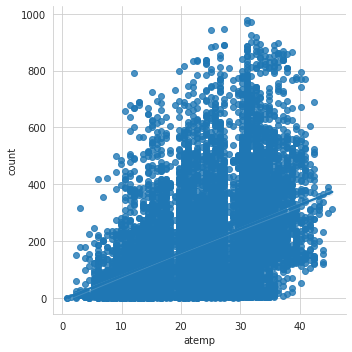

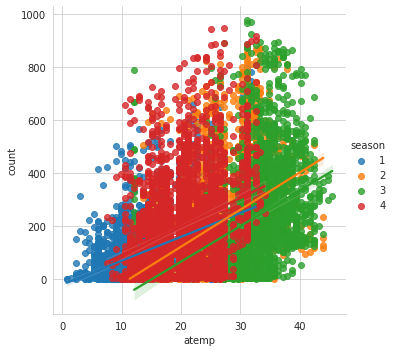

In [23]:
sns.lmplot(x ='atemp', y ='count', data = df_train)
sns.lmplot(
    data=df_train,
    x="atemp", y="count", hue="season",
)

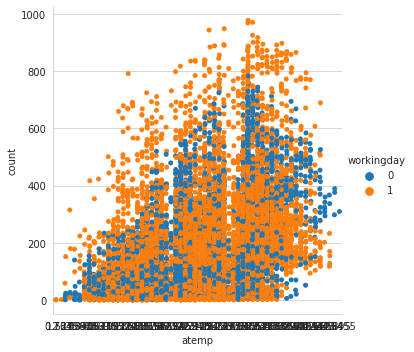

In [24]:
sns.catplot(x="atemp",y="count",hue="workingday",data=df_train)


## Train your model (Regression)

In [26]:
X= df_train[['atemp']]
y=df_train[["count"]]


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)
X_train

,atemp
5083,21.970
1468,21.210
3999,25.760
1567,22.725
6116,12.880
...,...
6017,15.150
709,15.150
10679,15.150
8366,32.575


In [28]:
X_train_1=df_test.iloc[:,5]
X_train_1=pd.DataFrame(X_train_1)
X_train_1

,atemp
0,11.365
1,13.635
2,13.635
3,12.880
4,12.880
...,...
6488,12.880
6489,12.880
6490,12.880
6491,13.635


In [29]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train, y_train)

LinearRegression()

In [30]:
slr.intercept_

array([-2.57448695])

In [31]:
from sklearn import metrics
y_pred = slr.predict(X_train_1)


In [32]:
y_pred

array([[ 90.59991132],
       [109.21019588],
       [109.21019588],
       ...,
       [103.02043163],
       [109.21019588],
       [109.21019588]])

In [33]:
X=df_train[["atemp","workingday","holiday","season"]]
y=df_train[["count"]]
X

,atemp,workingday,holiday,season
0,14.395,0,0,1
1,13.635,0,0,1
2,13.635,0,0,1
3,14.395,0,0,1
4,14.395,0,0,1
...,...,...,...,...
10881,19.695,1,0,4
10882,17.425,1,0,4
10883,15.910,1,0,4
10884,17.425,1,0,4


In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [35]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(X_train,y_train)
print("Coefficitent:",regr.coef_)

Coefficitent: [[ 7.91546308  1.60847148 -0.82270066 11.13389527]]


In [36]:
y_hat=regr.predict(X_test)

print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y_test) ** 2))


Residual sum of squares: 28484.56


In [37]:
y_hat

array([[267.60995508],
       [190.50067505],
       [151.20036129],
       ...,
       [121.24033354],
       [181.19996636],
       [250.49988519]])

## Test Result

## Send us the Result (Maktabkhoone)